In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image

from helpers import get_fen_labels_from_dir, fens_from_chessboards

In [ ]:
# Load the model

MODEL_FILEPATH = os.path.join(
    os.getcwd(),
    "model_checkpoints",
    "chess_pieces.keras"
    )

model = keras.models.load_model(MODEL_FILEPATH)

In [3]:
# Load the chess board image dataset

TEST_CHESS_BOARDS_PATH = os.path.join(
    os.getcwd(),
    "data",
    "test"
    )

fen_test_data = keras.utils.image_dataset_from_directory(
    TEST_CHESS_BOARDS_PATH,  # path to images
    labels=get_fen_labels_from_dir(TEST_CHESS_BOARDS_PATH),
    label_mode='int',
    color_mode='rgb',  # alternatives: 'grayscale', 'rgba'
    batch_size=100,
    image_size=(400, 400),
    shuffle=False,
    validation_split=None,  # percentage of validation data
    interpolation='bilinear',  # interpolation method used when resizing images
    follow_links=False,  # follow folder structure?
    crop_to_aspect_ratio=False
    )

Found 20000 files belonging to 20000 classes.


In [4]:
# Compare predicted fens to true fens

accuracy, fens_pred = fens_from_chessboards(model, fen_test_data)

print(f'Accuracy = {accuracy}')  # 0.9996 (8 wrong fens out of 20000)
print('First 3 predicted fens:')
for i in range(3):
    print(fens_pred[i])

Accuracy = 0.9996
First 3 predicted fens:
1B1B2K1-1B6-5N2-6k1-8-8-8-4nq2
1B1B3R-8-1b2k3-8-2n5-1rK5-b7-8
1B1B4-4R3-2R2p2-K7-8-3b3r-2Q4P-R2k4


2025-10-29 17:57:14.258162: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


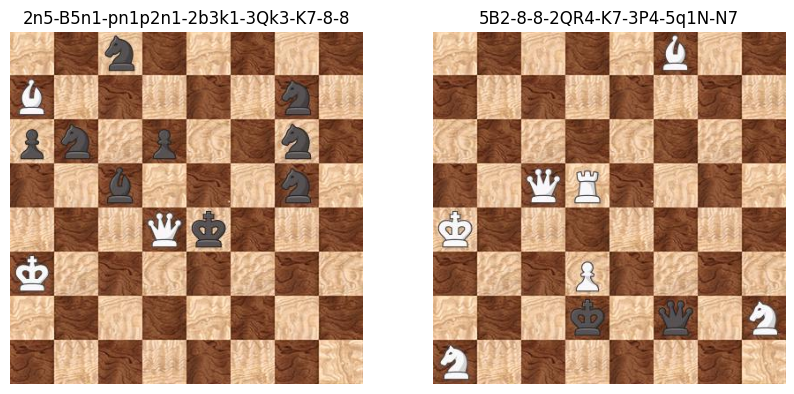

In [5]:
# Plot (some) boards with the wrongly predicted fens

fens_true = get_fen_labels_from_dir(TEST_CHESS_BOARDS_PATH)
confused_indexes = np.where(fens_true != fens_pred)[0]  # 8 wrong predictions
filepaths = [os.path.join(TEST_CHESS_BOARDS_PATH, fens_true[i] + '.jpeg')
             for i in confused_indexes]

n_figs = 2
plt.figure(figsize=(10, 20))
for i, index in enumerate(confused_indexes):
    img = Image.open(filepaths[i])
    plt.subplot(1, n_figs, i+1)
    plt.imshow(img)
    plt.title(fens_pred[index])
    plt.axis("off")
    if i == n_figs - 1:
        break
plt.show()